In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# Load the dataset
data = pd.read_csv("D:/Downloads/archive (6)/retail_sales_dataset.csv")

# Preview the dataset
print(data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [4]:
data.shape

(1000, 9)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values if any
data.dropna(inplace=True) 

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [8]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [9]:
# Total Sales
total_sales = data['Total Amount'].sum()
print(f"Total Sales: ${total_sales:.2f}")

# Average Order Value
average_order_value = data.groupby('Transaction ID')['Total Amount'].sum().mean()
print(f"Average Order Value: ${average_order_value:.2f}")

# Sales by Product Category
sales_by_category = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("Sales by Product Category:")
print(sales_by_category)

# Sales by Gender
sales_by_gender = data.groupby('Gender')['Total Amount'].sum()
print("Sales by Gender:")
print(sales_by_gender)


Total Sales: $456000.00
Average Order Value: $456.00
Sales by Product Category:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64
Sales by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_21176\2379006269.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='Date')['Total Amount'].sum()


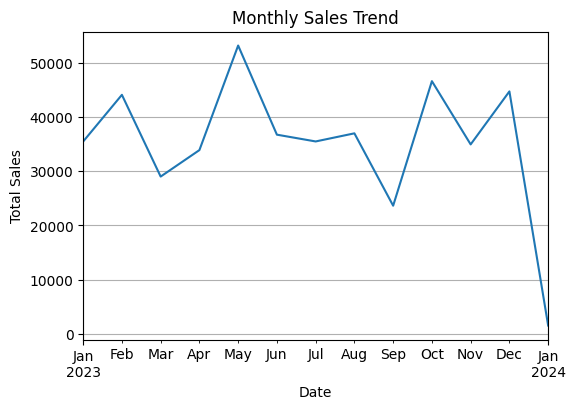

In [11]:
# Resample by month and plot sales trend
monthly_sales = data.resample('M', on='Date')['Total Amount'].sum()

plt.figure(figsize=(6, 4))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


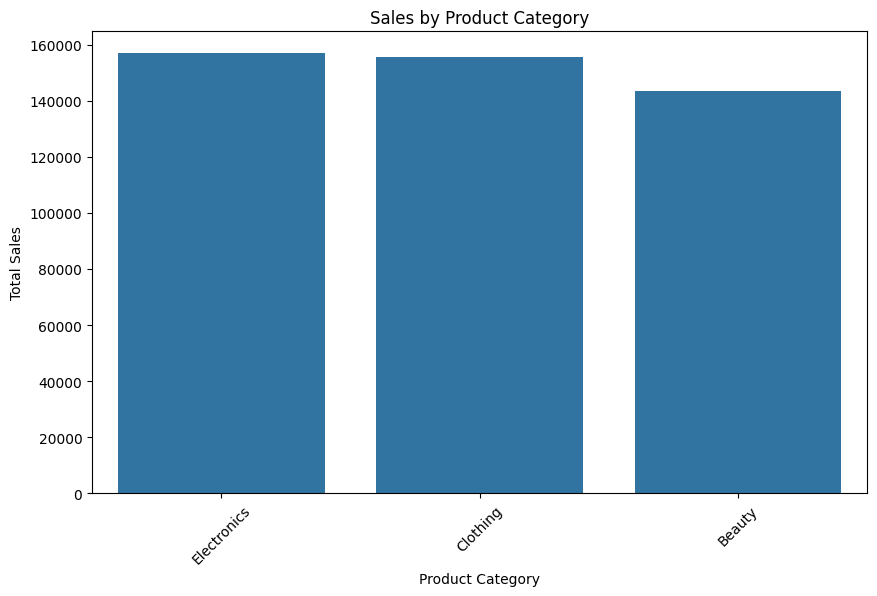

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


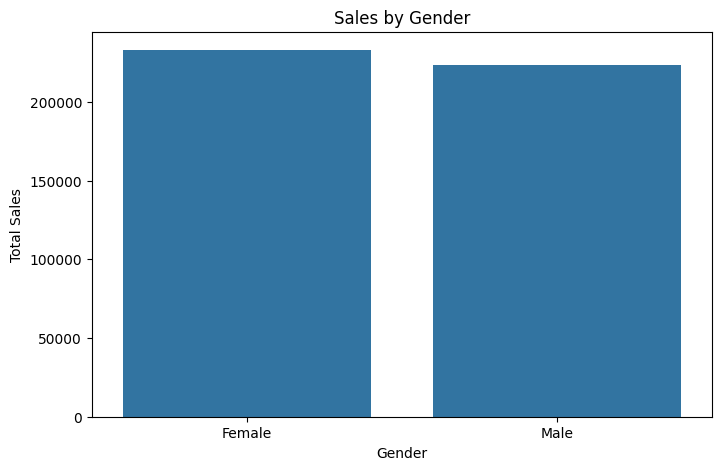

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values)
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()


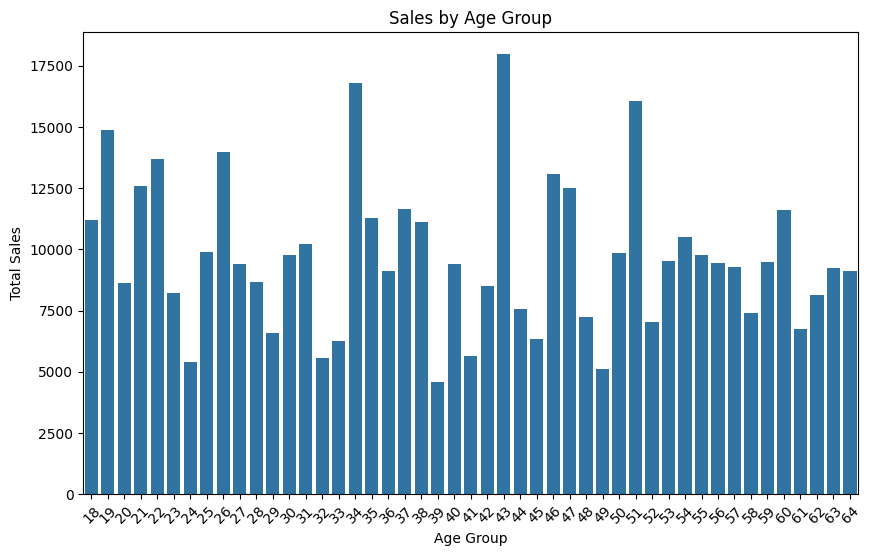

In [14]:
# Assuming age groups are defined in the dataset
age_group_sales = data.groupby('Age')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_sales.index, y=age_group_sales.values)
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [15]:
# Save key metrics to a CSV file
metrics = pd.DataFrame({
    'Metric': ['Total Sales', 'Average Order Value'],
    'Value': [total_sales, average_order_value]
})
metrics.to_csv('analysis_metrics.csv', index=False)


# SQL Database Creation

In [21]:
# Create the Customers DataFrame
customers = data[['Customer ID', 'Gender', 'Age']].drop_duplicates()
customers.rename(columns={
    'Customer ID': 'CustomerID',
    'Gender': 'Gender',
    'Age': 'Age'
}, inplace=True)

# Create the Products DataFrame
products = data[['Product Category', 'Price per Unit']].drop_duplicates()
products.rename(columns={
    'Product Category': 'Category',
    'Price per Unit': 'Price'
}, inplace=True)
# Assign a unique ProductID for each product category and price combination
products['ProductID'] = range(1, len(products) + 1)

# Create the Sales DataFrame
sales = data[['Transaction ID', 'Date', 'Customer ID', 'Product Category', 'Quantity', 'Total Amount']]
sales.rename(columns={
    'Transaction ID': 'SaleID',
    'Customer ID': 'CustomerID',
    'Product Category': 'Category'
}, inplace=True)
sales['Date'] = pd.to_datetime(sales['Date'])

# Print out the DataFrames to check
print("Customers DataFrame:")
print(customers.head())

print("Products DataFrame:")
print(products.head())

print("Sales DataFrame:")
print(sales.head())

Customers DataFrame:
  CustomerID  Gender  Age
0    CUST001    Male   34
1    CUST002  Female   26
2    CUST003    Male   50
3    CUST004    Male   37
4    CUST005    Male   30
Products DataFrame:
      Category  Price  ProductID
0       Beauty     50          1
1     Clothing    500          2
2  Electronics     30          3
5       Beauty     30          4
6     Clothing     25          5
Sales DataFrame:
   SaleID       Date CustomerID     Category  Quantity  Total Amount
0       1 2023-11-24    CUST001       Beauty         3           150
1       2 2023-02-27    CUST002     Clothing         2          1000
2       3 2023-01-13    CUST003  Electronics         1            30
3       4 2023-05-21    CUST004     Clothing         1           500
4       5 2023-05-06    CUST005       Beauty         2           100


C:\Users\DELL\AppData\Local\Temp\ipykernel_21176\1236756866.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.rename(columns={
C:\Users\DELL\AppData\Local\Temp\ipykernel_21176\1236756866.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Date'] = pd.to_datetime(sales['Date'])


In [22]:
# Connect to SQLite database
conn = sqlite3.connect('sales_performance.db')
cursor = conn.cursor()

# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS Customers (
    CustomerID TEXT PRIMARY KEY,
    Gender TEXT,
    Age INTEGER
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Products (
    ProductID INTEGER PRIMARY KEY,
    Category TEXT,
    Price REAL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Sales (
    SaleID INTEGER PRIMARY KEY,
    Date DATE,
    CustomerID TEXT,
    ProductID INTEGER,
    Quantity INTEGER,
    Amount REAL,
    FOREIGN KEY (CustomerID) REFERENCES Customers (CustomerID),
    FOREIGN KEY (ProductID) REFERENCES Products (ProductID)
)
''')

# Commit changes and close connection
conn.commit()


In [23]:
# Map Product Category to ProductID
sales = sales.merge(products[['Category', 'ProductID']], on='Category')

# Import data into SQL tables
customers.to_sql('Customers', conn, if_exists='replace', index=False)
products.to_sql('Products', conn, if_exists='replace', index=False)
sales.to_sql('Sales', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [25]:
conn = sqlite3.connect('sales_performance.db')

# Load data from SQL tables into DataFrames
sales_data = pd.read_sql('SELECT * FROM Sales', conn)
customers_data = pd.read_sql('SELECT * FROM Customers', conn)
products_data = pd.read_sql('SELECT * FROM Products', conn)

# Total Sales
total_sales = sales_data['Total Amount'].sum()
print(f"Total Sales: ${total_sales:.2f}")

# Average Order Value
average_order_value = sales_data.groupby('SaleID')['Total Amount'].sum().mean()
print(f"Average Order Value: ${average_order_value:.2f}")

conn.close()


Total Sales: $2280000.00
Average Order Value: $2280.00


# Total Sales by Product Category

In [28]:
query = """
SELECT p.Category, SUM(s.[Total Amount]) AS TotalSales
FROM sales s
JOIN Products p ON s.ProductID = p.ProductID
GROUP BY p.Category
ORDER BY TotalSales DESC;
"""

total_sales_by_category = pd.read_sql(query, conn)
print(total_sales_by_category)


      Category  TotalSales
0  Electronics      784525
1     Clothing      777900
2       Beauty      717575


# Average Order Value by Customer

In [29]:
query = """
SELECT s.CustomerID, AVG(s.[Total Amount]) AS AvgOrderValue
FROM sales s
GROUP BY s.CustomerID
ORDER BY AvgOrderValue DESC;
"""

avg_order_value_per_customer = pd.read_sql(query, conn)
print(avg_order_value_per_customer)


    CustomerID  AvgOrderValue
0      CUST970         2000.0
1      CUST946         2000.0
2      CUST927         2000.0
3      CUST875         2000.0
4      CUST832         2000.0
..         ...            ...
995    CUST201           25.0
996    CUST191           25.0
997    CUST185           25.0
998    CUST103           25.0
999    CUST044           25.0

[1000 rows x 2 columns]


# Total Sales by Gender

In [30]:
query = """
SELECT c.Gender, SUM(s.[Total Amount]) AS TotalSales
FROM sales s
JOIN Customers c ON s.CustomerID = c.CustomerID
GROUP BY c.Gender
ORDER BY TotalSales DESC;
"""

total_sales_by_gender = pd.read_sql(query, conn)
print(total_sales_by_gender)


   Gender  TotalSales
0  Female     1164200
1    Male     1115800


# Sales Trend Over Time


In [31]:
query = """
SELECT strftime('%Y-%m', s.Date) AS Month, SUM(s.[Total Amount]) AS MonthlySales
FROM sales s
GROUP BY Month
ORDER BY Month;
"""

sales_trend_over_time = pd.read_sql(query, conn)
print(sales_trend_over_time)


      Month  MonthlySales
0   2023-01        177250
1   2023-02        220300
2   2023-03        144950
3   2023-04        169350
4   2023-05        265750
5   2023-06        183575
6   2023-07        177325
7   2023-08        184800
8   2023-09        118100
9   2023-10        232900
10  2023-11        174600
11  2023-12        223450
12  2024-01          7650


# Total Quantity Sold by Product

In [37]:
query = """
SELECT p.ProductID, p.Category, SUM(s.Quantity) AS TotalQuantity
FROM sales s
JOIN Products p ON s.ProductID = p.ProductID
GROUP BY p.ProductID, p.Category
ORDER BY TotalQuantity DESC;
"""

total_quantity_by_product = pd.read_sql(query, conn)
print(total_quantity_by_product)


    ProductID     Category  TotalQuantity
0           2     Clothing            894
1           5     Clothing            894
2           8     Clothing            894
3          11     Clothing            894
4          12     Clothing            894
5           3  Electronics            849
6           6  Electronics            849
7           7  Electronics            849
8          10  Electronics            849
9          15  Electronics            849
10          1       Beauty            771
11          4       Beauty            771
12          9       Beauty            771
13         13       Beauty            771
14         14       Beauty            771


# Customer Demographics Analysis
Examine the distribution of customers by age group and gender.

In [33]:
query = """
SELECT c.Gender, 
       CASE 
           WHEN c.Age < 20 THEN 'Under 20'
           WHEN c.Age BETWEEN 20 AND 30 THEN '20-30'
           WHEN c.Age BETWEEN 31 AND 40 THEN '31-40'
           WHEN c.Age BETWEEN 41 AND 50 THEN '41-50'
           ELSE '51 and above'
       END AS AgeGroup,
       COUNT(c.CustomerID) AS NumberOfCustomers
FROM Customers c
GROUP BY c.Gender, AgeGroup
ORDER BY c.Gender, AgeGroup;
"""

customer_demographics = pd.read_sql(query, conn)
print(customer_demographics)


   Gender      AgeGroup  NumberOfCustomers
0  Female         20-30                115
1  Female         31-40                 97
2  Female         41-50                116
3  Female  51 and above                158
4  Female      Under 20                 24
5    Male         20-30                116
6    Male         31-40                 96
7    Male         41-50                105
8    Male  51 and above                155
9    Male      Under 20                 18


# High-Value Customers
Identify customers who have made the highest total purchases.

In [34]:
query = """
SELECT s.CustomerID, SUM(s.[Total Amount]) AS TotalSpent
FROM sales s
GROUP BY s.CustomerID
HAVING TotalSpent > 500
ORDER BY TotalSpent DESC;
"""

high_value_customers = pd.read_sql(query, conn)
print(high_value_customers)

    CustomerID  TotalSpent
0      CUST970       10000
1      CUST946       10000
2      CUST927       10000
3      CUST875       10000
4      CUST832       10000
..         ...         ...
538    CUST092         600
539    CUST055         600
540    CUST039         600
541    CUST023         600
542    CUST014         600

[543 rows x 2 columns]
